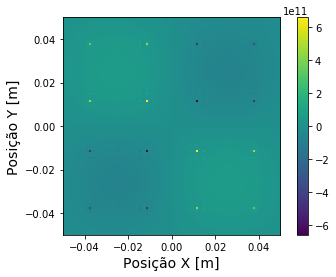

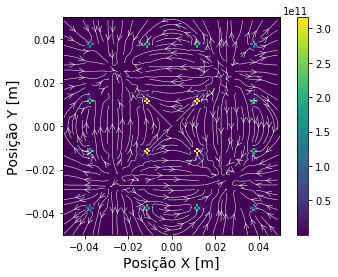

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

#######################################################################
#--Este programa calcula o potencial e o campo gerado por uma---------#
#--placa carregada de tamanho LxL, onde L = 10cm. A placa possui------#
#--uma distribuição de carga definida dada pela função----------------#
#--"charge_dist". O potencial e o campo são todos calculados em-------#
#--um plano de 1m^2 com pontos espaçados de 1cm. O potencial é--------#
#--calculado por meio de uma Quadratura Gaussiana Dupla e o campo-----#
#--é o gradiente.-----------------------------------------------------#
#######################################################################


def charge_dist(x, y, L):
    q_0 = 100    #[Cm^-2]
    L  = 10e-2  #[m]
    return q_0*np.sin(2*np.pi*x/L)*np.sin(2*np.pi*y/L)

def Potencial(xp, wp, x, y, L):
    eps_0 = 8.8541e-12  #[C^2 N^-1 m^-2]
    N     = len(xp) 

    pot = 0
    for i in range(N):
        for j in range(N):
            R    = ((x - xp[i])**2 + (y - xp[j])**2)**0.5
            pot += wp[i]*wp[j]*charge_dist(xp[i],xp[j], L)/R
            
    return pot/(4*np.pi*eps_0)

# d: Espaçamento dos pontos
# D: Tamanho do plano
# L: Tamanho da placa
# N: Número de pontos na quadratura

d = 1e-2  #[m]
D = 0.1     #[m]
L = 10e-2 #[m]
N = 100

# Pontos e pesos usados na quadratura Gaussiana
xp,wp = gaussxwab(N, -L/2, L/2)

# Criação do Meshgrid para calculo do potencial
x     = np.linspace(-D/2, D/2, int(D*10/d))
y     = x.copy()
X, Y  = np.meshgrid(x,y)

# Potencial e Campo Elétrico
Pot     = Potencial(xp,wp,X,Y,L)
Ey,Ex   = np.gradient(-Pot)

P_color = plt.imshow(Pot, extent = [-D/2, D/2, -D/2, D/2])
plt.colorbar(P_color)
plt.xlabel('Posição X [m]', size = 14)
plt.ylabel('Posição Y [m]', size = 14)
plt.show()

E_stream = plt.streamplot(x, y, Ex, Ey, color='w', linewidth=0.5, 
                          density=1.5, arrowstyle='->', arrowsize=1.3)

E_strght = plt.imshow(np.hypot(Ex,Ey), extent = [-D/2, D/2, -D/2, D/2])

plt.xlabel('Posição X [m]', size = 14)
plt.ylabel('Posição Y [m]', size = 14)
plt.colorbar(E_strght)
plt.show()